<a href="https://colab.research.google.com/github/Vynogradova/homework/blob/main/Homework_10_%22%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [5]:
print(df.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'month',
       'hour', 'weekday', 'weekday_num', 'week', 'year', 'day'],
      dtype='object')


In [16]:
# Створюємо повну дату
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Встановлюємо індекс
df.set_index('date', inplace=True)

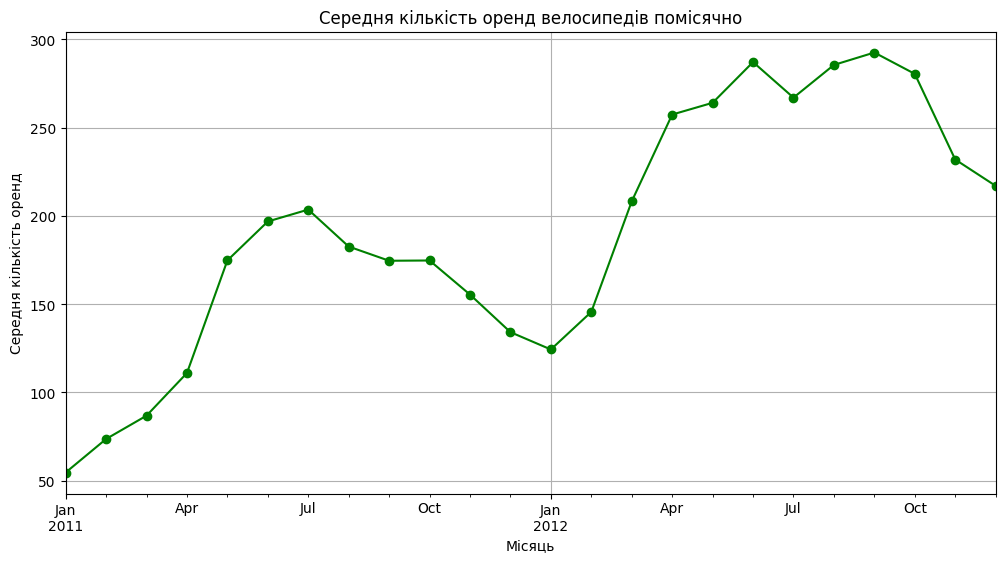

In [17]:
monthly_avg = df['count'].resample('ME').mean()  # або 'MS' — початок місяця

# Побудова через pandas plot
monthly_avg.plot(marker='o', color='green', figsize=(12, 6), title='Середня кількість оренд велосипедів помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

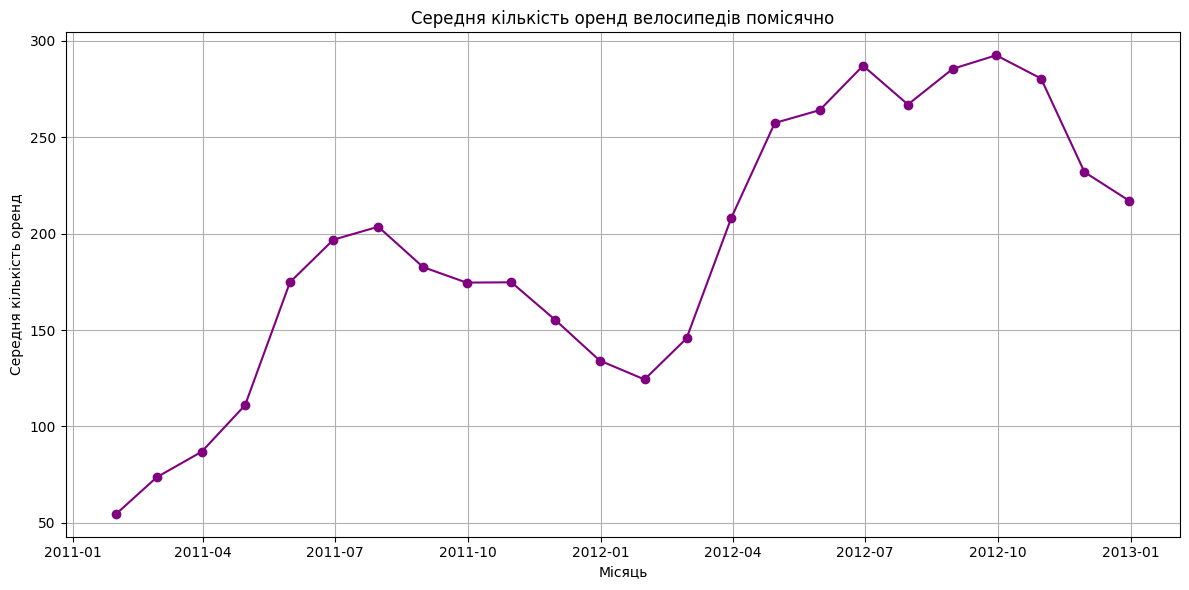

In [18]:
monthly_avg = df['count'].resample('ME').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='purple')
plt.title('Середня кількість оренд велосипедів помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

Обидва графіки показують одну і ту ж інформацію, тому відмінностей у даних — немає, лише у стилі подачі. Для мене наразі зрозуміліше Pandas, тому що він був перший у вивченні матеріалу.

Якщо потрібно швидко подивитися, чи все в порядку з даними — Pandas plot.

Matplotlib: більше гнучкості, чіткість, контроль над кожною деталлю.

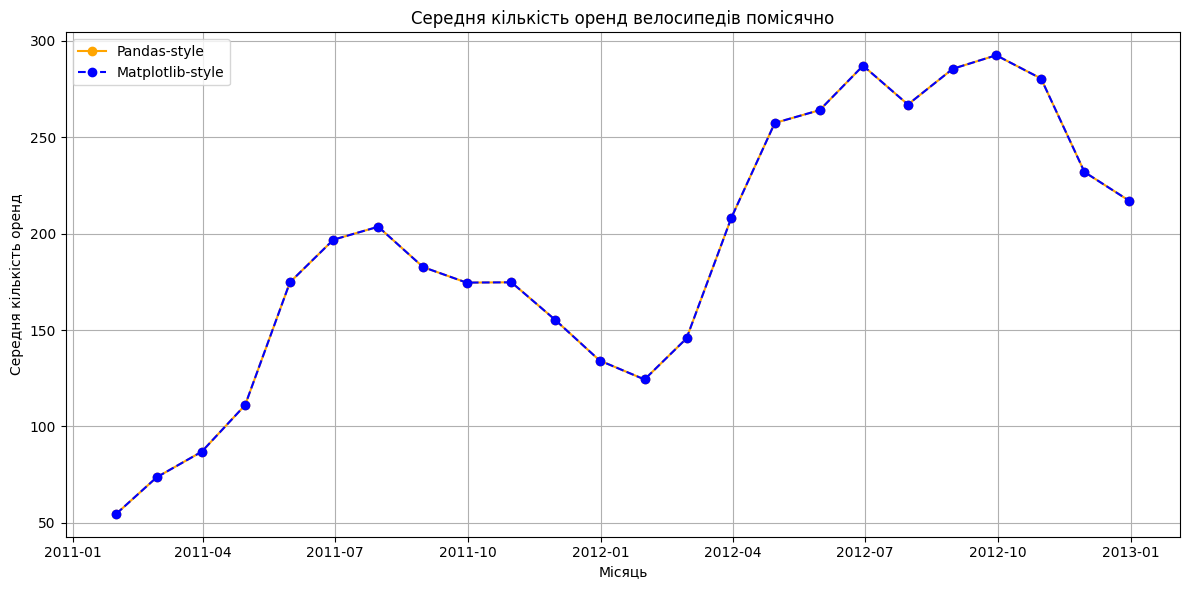

In [22]:
monthly_avg = df['count'].resample('ME').mean()

# Побудова графіка повністю через matplotlib
plt.figure(figsize=(12, 6))

# Pandas-лінія вручну (orange)
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', color='orange', label='Pandas-style')

# Matplotlib-лінія (blue dashed)
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='--', color='blue', label='Matplotlib-style')

plt.title('Середня кількість оренд велосипедів помісячно')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [23]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

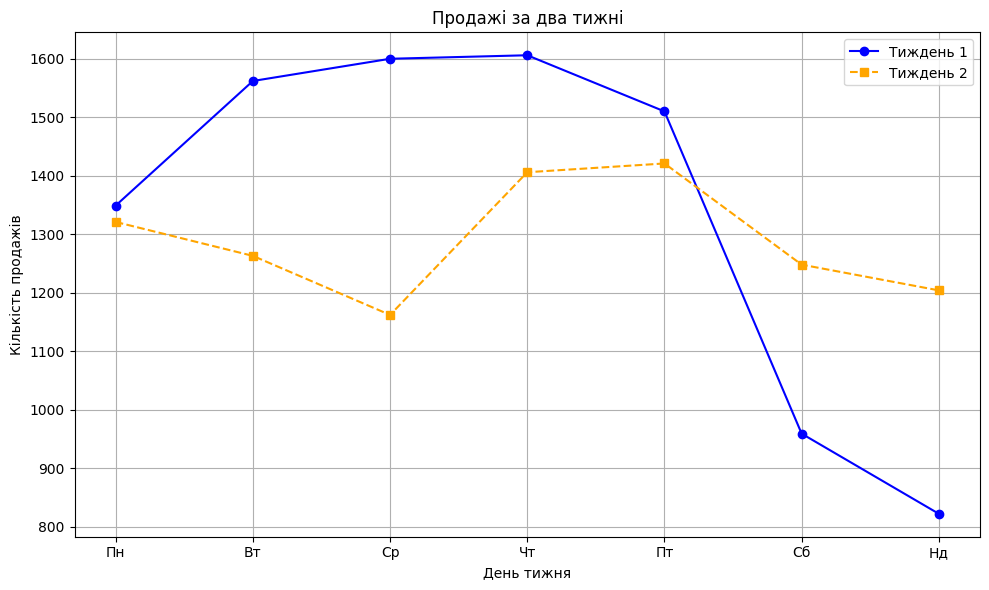

In [24]:
# Назви днів тижня
day_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

# Створення графіка
plt.figure(figsize=(10, 6))

# Побудова графіків
plt.plot(days, sales_week1, marker='o', linestyle='-', color='blue', label='Тиждень 1')
plt.plot(days, sales_week2, marker='s', linestyle='--', color='orange', label='Тиждень 2')

# Додаткові налаштування
plt.title('Продажі за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.xticks(days, day_labels)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Судячи з графіку, в який тиждень проодажі були стабільніше?
Стабільнішими були продажі у тиждень 2.
Це видно з графіка: лінія тижня 2 (помаранчева) має менші коливання між днями, тоді як тиждень 1 (синя лінія) має різкі спади в суботу та неділю.
#Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.
Можна обчислити стандартне відхилення (standard deviation) – це показник розкиду значень навколо середнього.

Менше стандартне відхилення = стабільніші продажі.
У нас випадку тиждень 2 має менше відхилення, а отже — більшу стабільність.

In [25]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення тижня 1: {std_week1:.2f}")
print(f"Стандартне відхилення тижня 2: {std_week2:.2f}")

Стандартне відхилення тижня 1: 300.00
Стандартне відхилення тижня 2: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [28]:
print(df.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'month',
       'hour', 'weekday', 'weekday_num', 'week', 'year', 'day'],
      dtype='object')


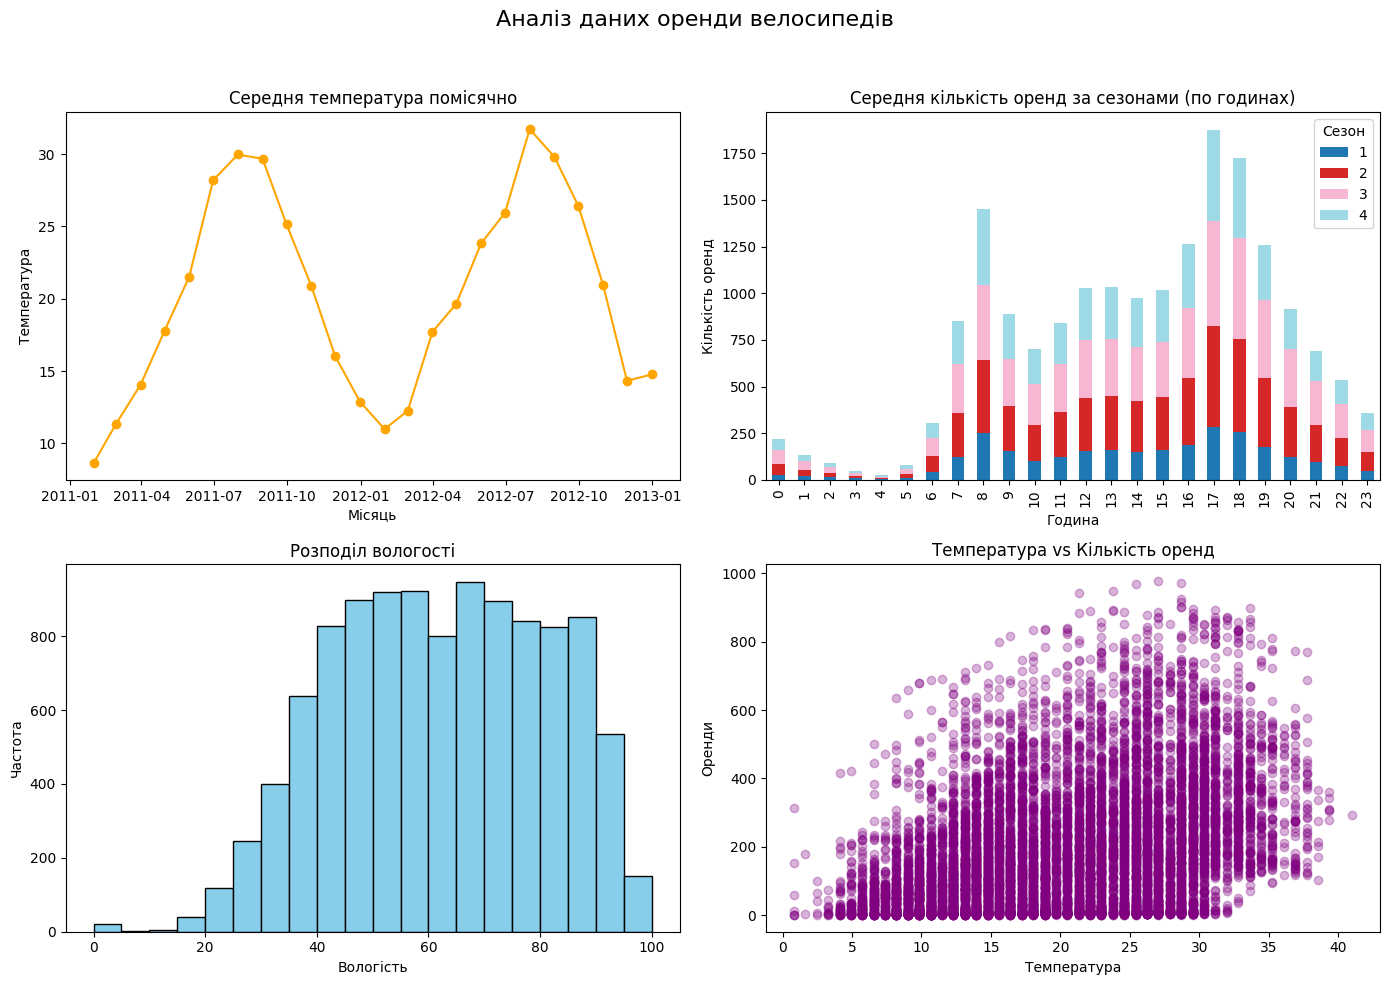

In [35]:
# Створення колонки 'date' (якщо ще не створена)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Лінійний графік: середня температура помісячно
monthly_avg_temp = df.set_index('date').resample('ME')['temp'].mean()

# Стовпчикова діаграма: середня оренда за сезонами по годинах
season_hour_avg = df.groupby(['season', 'hour'])['count'].mean().unstack()

# Гістограма вологості
humidity = df['humidity']

# Scatter plot: температура vs оренда
temp = df['temp']
rentals = df['count']

# Побудова subplot-сітки
plt.figure(figsize=(14, 10))
plt.suptitle('Аналіз даних оренди велосипедів', fontsize=16)

# 1. Лінійний графік
plt.subplot(2, 2, 1)
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='orange')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')

# 2. Стовпчикова діаграма
plt.subplot(2, 2, 2)
season_hour_avg.T.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab20')
plt.title('Середня кількість оренд за сезонами (по годинах)')
plt.xlabel('Година')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон', loc='upper right')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity, bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Частота')

# 4. Scatter plot температура vs оренда
plt.subplot(2, 2, 4)
plt.scatter(temp, rentals, alpha=0.3, color='purple')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Оренди')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # для кращого розташування
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

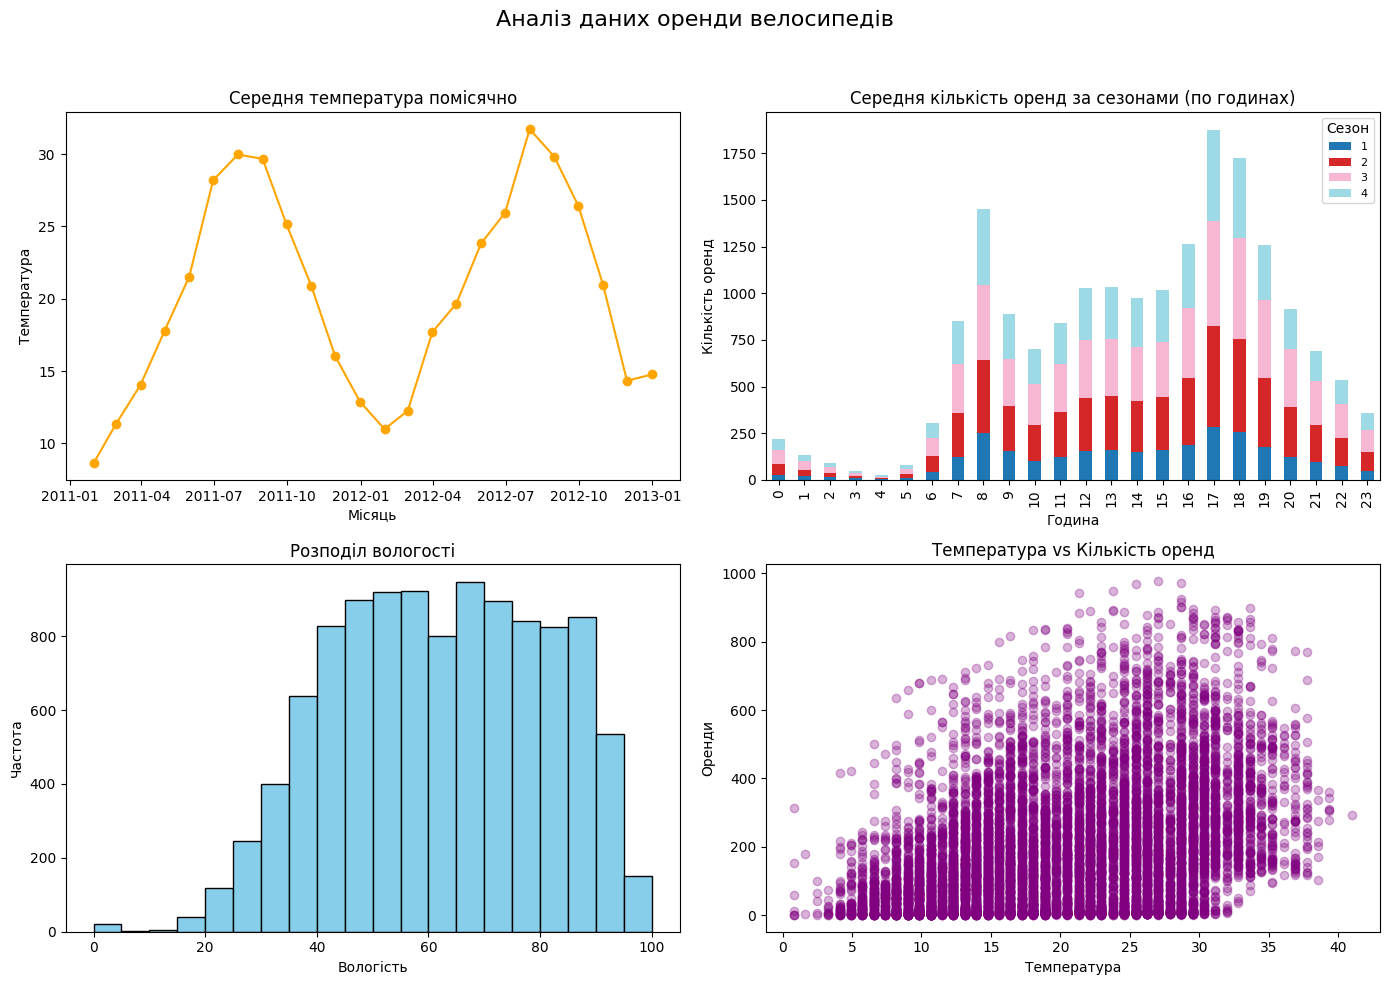

In [36]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Дані для кожного графіка
monthly_avg_temp = df.set_index('date').resample('ME')['temp'].mean()
season_hour_avg = df.groupby(['season', 'hour'])['count'].mean().unstack()
humidity = df['humidity']
temp = df['temp']
rentals = df['count']

# Створення фігури та осей
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Аналіз даних оренди велосипедів', fontsize=16)

# 1. Лінійний графік температури
ax[0, 0].plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', color='orange')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')

# 2. Стовпчикова діаграма сезон-година
season_hour_avg.T.plot(kind='bar', stacked=True, ax=ax[0, 1], colormap='tab20')
ax[0, 1].set_title('Середня кількість оренд за сезонами (по годинах)')
ax[0, 1].set_xlabel('Година')
ax[0, 1].set_ylabel('Кількість оренд')
ax[0, 1].legend(title='Сезон', fontsize=8)

# 3. Гістограма вологості
ax[1, 0].hist(humidity, bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')

# 4. Scatter plot: температура vs оренда
ax[1, 1].scatter(temp, rentals, alpha=0.3, color='purple')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Оренди')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Чим відрізняється підхід побудови кількох графіків на одній фігурі з plt.subplots() від plt.subplot()?

plt.subplot() — простий у використанні, але менш гнучкий. Зручно для швидких графіків, однак при великій кількості підграфіків може бути не зовсім зручно керувати розташуванням.

plt.subplots() — дає більше контролю над розміщенням графіків, зручніше організовувати багато підграфіків. Кожен підграфік доступний як окремий об'єкт, що дозволяє легко налаштовувати заголовки, підписи та стилі.



## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [80]:
print(df.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'month'],
      dtype='object')


In [85]:
print(df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count    month  
0        81        0.0       3          13     16  2011-01  
1        80        0.0       8          32     40  2011-01  
2        80        0.0       5          27     32  2011-01  
3        75        0.0       3          10     13  2011-01  
4        75        0.0       0           1      1  2011-01  


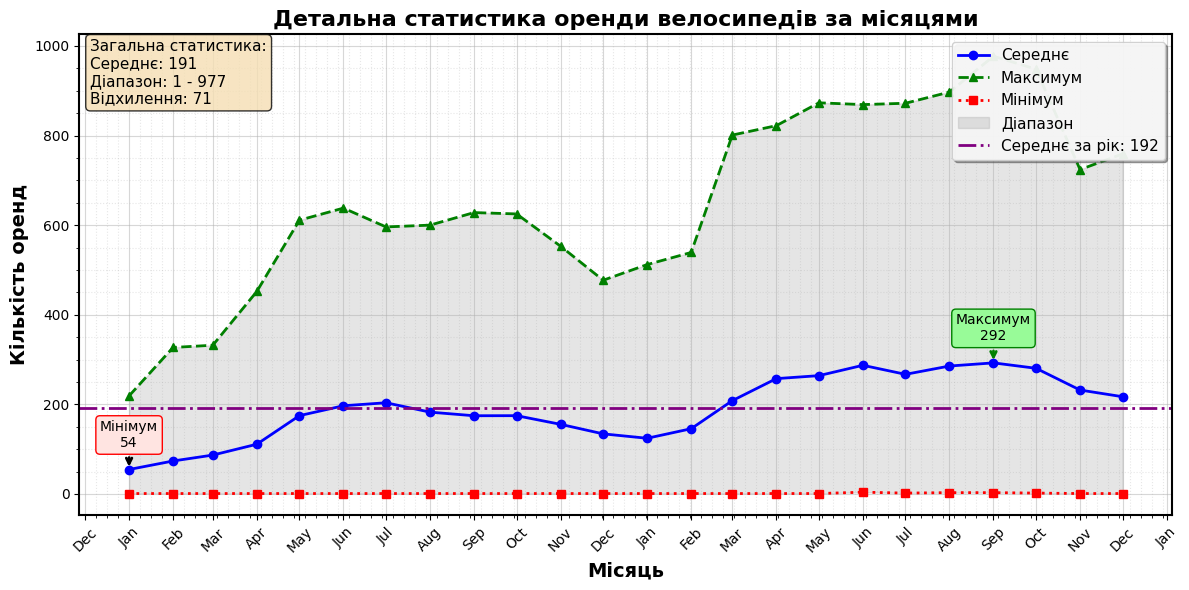

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.to_period('M')
monthly_stats = df.groupby('month')['count'].agg(['mean', 'max', 'min'])

# Переіменування для зручності
monthly_stats.columns = ['Середнє', 'Максимум', 'Мінімум']
months = monthly_stats.index.to_timestamp()

# Побудова графіка
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(months, monthly_stats['Середнє'], 'bo-', linewidth=2, label='Середнє')
ax.plot(months, monthly_stats['Максимум'], 'g^--', linewidth=2, label='Максимум')
ax.plot(months, monthly_stats['Мінімум'], 'rs:', linewidth=2, label='Мінімум')

# Заливка між максимумом і мінімумом
ax.fill_between(months, monthly_stats['Мінімум'], monthly_stats['Максимум'],
                alpha=0.2, color='gray', label='Діапазон')

# Горизонтальна лінія середнього за рік
mean_year = df['count'].mean()
ax.axhline(mean_year, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {mean_year:.0f}')

# Анотації для мінімального та максимального середнього значення
min_idx = monthly_stats['Середнє'].idxmin().to_timestamp()
min_val = monthly_stats['Середнє'].min()
ax.annotate(f'Мінімум\n{int(min_val)}', xy=(min_idx, min_val),
            xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', lw=2, color='black'),
            fontsize=10, ha='center',
            bbox=dict(facecolor='mistyrose', edgecolor='red', boxstyle='round'))

max_idx = monthly_stats['Середнє'].idxmax().to_timestamp()
max_val = monthly_stats['Середнє'].max()
ax.annotate(f'Максимум\n{int(max_val)}', xy=(max_idx, max_val),
            xytext=(max_idx, max_val + 50),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'),
            fontsize=10, ha='center',
            bbox=dict(facecolor='palegreen', edgecolor='green', boxstyle='round'))

# Оформлення
ax.set_title('Детальна статистика оренди велосипедів за місяцями', fontsize=16, fontweight='bold')
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')

# Форматування осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', rotation=45)

# Двошарова сітка
ax.grid(True, which='major', linestyle='-', alpha=0.5)
ax.grid(True, which='minor', linestyle=':', alpha=0.3)
ax.minorticks_on()

# Стилізована легенда
ax.legend(loc='upper right', fontsize=11, frameon=True, shadow=True, fancybox=True, framealpha=0.9)

# Текстовий блок зі статистикою
textstr = 'Загальна статистика:\n' \
          'Середнє: 191\n' \
          'Діапазон: 1 - 977\n' \
          'Відхилення: 71'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.01, 0.99, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Рамка графіка
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()
